Importing Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import interpolate


Quadratic Created using Inbuilt function

In [37]:
def spline(x,y,xnew):
  f = interpolate.interp1d(x, y, kind='quadratic')
  # Plotting the function
  plt.plot(xnew, f(xnew))
  return f(xnew)

In [148]:
def pplot(xi,yi,x,ynew):
  plt.plot(x, ynew)
  plt.scatter(xi,yi, c ="blue")
  plt.plot(xi,yi)
  fcubic = interpolate.interp1d(xi, yi, kind='cubic')
  plt.plot(x, fcubic(x), c="black")
  plt.title("Spline Interpolation" ) 
  plt.legend(["Points",'Quadratic spline','Linear plot',"Cubic"])
  plt.show()

Using INbuilt functions
QUADRATIC PLOT I


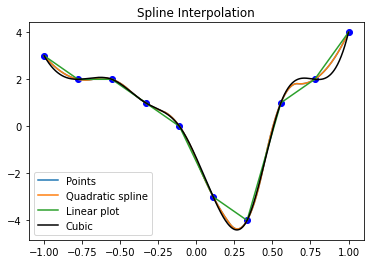

QUADRATIC PLOT II


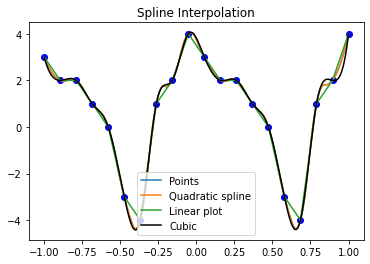

In [149]:

def main():
	# INITIAL VALUES IN USE
  xi= np.linspace(-1,1,10)
  x = np.linspace(-1,1,1000)
  yi=[3,2,2,1,0,-3,-4,1,2,4]
  xj=np.linspace(-1,1,20)
  yj = [3, 2, 2, 1, 0, -3, -4, 1, 2, 4, 3, 2, 2, 1, 0, -3, -4, 1, 2, 4]
  
	#Calling the Spline Interpolation Function
  ynew = spline(xi,yi,x)
  print("Using INbuilt functions")
  print("QUADRATIC PLOT I" )
  pplot(xi,yi,x,ynew)
  y2 = spline(xj,yj,x)
  print("QUADRATIC PLOT II" )
  pplot(xj,yj,x,y2)
if __name__ == "__main__":
	main()

Quadratic using matrix method

In [ ]:
# INITIAL VALUES IN USE
xi= np.asarray(np.linspace(-1,1,10))
x = np.asarray(np.linspace(-1,1,1000))
yi=[3,2,2,1,0,-3,-4,1,2,4]

def matrix():
  A=[]
  G=[]
  Y=[]
  #part 1
  for i in range(0,len(yi)):
    #print(i)
    zi=np.asarray(np.zeros(3*i))
    z2=np.array([xi[i]*xi[i],xi[i],1])
    z3=np.asarray(np.zeros(3*(len(yi)-1-i)))
    A=np.concatenate([zi,z2,z3])
    G.append(A)
    #print(len(G[i]))
    if i==0:
      Y.append(yi[i])
    else:
      Y.append(yi[i])
      Y.append(yi[i])
  t=np.concatenate([np.asarray(Y),np.asarray(np.zeros(len(G[0])-len(Y)))])
  # part 2
  for i in range(0,len(yi)):
    zi=np.asarray(np.zeros(3*i))
    z2=np.array([2*xi[i],1,0,2*xi[i],1,0])
    q=(len(yi)-2-i)
    if q<0:
      q=0
      z2=np.delete(z2,3)
      z2=np.delete(z2,3)
      z2=np.delete(z2,3)
    z3=np.asarray(np.zeros(3*q))
    A=np.concatenate([zi,z2,z3])
    G.append(A)
    #print(len(G[10+i]))
  # part 3
  for i in range(0,len(yi)):
    zi=np.asarray(np.zeros(3*i))
    z2=np.array([1,0,0])
    z3=np.asarray(np.zeros(3*(len(yi)-1-i)))
    A=np.concatenate([zi,z2,z3])
    G.append(A)
    
  return np.asarray(G),t
G,t=matrix()
#print(len(G))

Ginv = np.linalg.inv(G)
t=np.flip(t)
m=Ginv@t
#print(len(m))
m=np.reshape(m, (10, 3))
#print(m[0][0])
for i in range(len(xi)-1):
  x_low=xi[i]
  x_high=xi[i+1]
  dist=(x_high-x_low)/100
  X=np.arange(x_low,x_high+dist, dist)
  a,b,c=m[i][0],m[i][1],m[i][2]
  FX=a + b * X + c * (X**2)
  plt.plot(X,FX,color="red")

fcubic = interpolate.interp1d(xi, yi, kind='cubic')
plt.plot(x, fcubic(x), c="black")
plt.show()